In [ ]:
#!pip install emoji

In [ ]:
#!pip install wordcloud

In [ ]:
import regex as re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#% matplotlib inline

In [ ]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
startsWithDateAndTime('7/26/18, 22:51 - Bobby: This message was deleted')

True

In [ ]:
df = pd.read_fwf("WA_Chat.txt") # put the name of the file here and then add to the library

In [ ]:
df

,Heading
0,"12/12/22, 02:18 - Aditya Pathak NC2: wow"
1,"12/12/22, 02:18 - Adymoss: Abey behki sabko ba..."
2,"12/12/22, 02:18 - Samarsayscheese: Haan usne a..."
3,"12/12/22, 02:19 - Adymoss: Bc meine poochha to..."
4,"12/12/22, 02:19 - Adymoss: Nahi usse shaadi ka..."
...,...
43689,"05/03/24, 01:29 - Adymoss: So hi jao"
43690,"05/03/24, 01:29 - Samarsayscheese: Tabhi toh a..."
43691,"05/03/24, 01:29 - Samarsayscheese: Mood theek ..."
43692,"05/03/24, 01:31 - Samarsayscheese: null"


In [ ]:
conversation = "WA_Chat.txt"  #Enter the name of the .txt file here

In [ ]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [ ]:
def getDataPoint(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [ ]:
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = []
    parsedData=[]
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDateAndTime(line):
            if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [ ]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
39978,2024-04-03,22:02,Samarsayscheese,Second of all
39979,2024-04-03,22:02,Samarsayscheese,Eval me maut ajegi 😭
39980,2024-04-03,22:02,Samarsayscheese,I literally have no clue kese karna hai yeh sabb
39981,2024-04-03,22:31,Adymoss,Us
39982,2024-04-03,22:31,Adymoss,Thoda isme samajh hi na ata kya hota hai
39983,2024-05-03,01:17,Adymoss,Maa chudae mos
39984,2024-05-03,01:17,Adymoss,Nini time
39985,2024-05-03,01:19,Tanmay NC2,Abe suno
39986,2024-05-03,01:22,Ananya,Kya Hua?
39987,2024-05-03,01:23,Adymoss,Soja


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     39998 non-null  datetime64[ns]
 1   Time     39998 non-null  object        
 2   Author   39506 non-null  object        
 3   Message  39998 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.2+ MB


In [ ]:
df.Author.unique()

array(['Aditya Pathak NC2', 'Adymoss', 'Samarsayscheese', 'Ananya',
       'Rishi NC2', None, 'Tanmay NC2', 'Dev D', 'Anikait NC2'],
      dtype=object)

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39506 entries, 0 to 39997
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     39506 non-null  datetime64[ns]
 1   Time     39506 non-null  object        
 2   Author   39506 non-null  object        
 3   Message  39506 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.5+ MB


In [ ]:
total_messages = df.shape[0]
print(total_messages)

39506


In [ ]:
df[df['Message'] == '<Media omitted>']

,Date,Time,Author,Message
54,2022-12-12,02:27,Ananya,<Media omitted>
57,2022-12-12,02:27,Ananya,<Media omitted>
123,2022-12-12,02:36,Aditya Pathak NC2,<Media omitted>
127,2022-12-12,02:37,Aditya Pathak NC2,<Media omitted>
134,2022-12-12,02:45,Aditya Pathak NC2,<Media omitted>
...,...,...,...,...
39919,2024-02-27,22:52,Samarsayscheese,<Media omitted>
39954,2024-01-03,23:03,Dev D,<Media omitted>
39955,2024-01-03,23:04,Dev D,<Media omitted>
39956,2024-01-03,23:04,Ananya,<Media omitted>


In [ ]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

2700


In [ ]:
df.iloc[-19,-1]

'Eval me maut ajegi 😭'

In [ ]:
data = re.findall("[^@%\t\r\na-zA-Z0-9!$^&*()_+{}\[\]:;<>,.?~\\\/\- ]"
, df.iloc[-19,-1])
data

['😭']

In [ ]:
df["Message"]

0                                             wow
1                     Abey behki sabko batata hai
2                            Haan usne ajj bataya
3               Bc meine poochha to bata diya tha
4                        Nahi usse shaadi karunga
                           ...                   
39993    Abey kuchh samajh na ara kya hoga kal bc
39994                                   So hi jao
39995                       Tabhi toh album kholi
39996                           Mood theek hogaya
39997                                        null
Name: Message, Length: 39506, dtype: object

In [ ]:
def split_count(text):


    emoji_list = []
    data = re.findall("[^@%\t\r\na-zA-Z0-9!$^&*()_+{}\[\]:;<>,.?~\\\/\- ]", text)
    for word in data:
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [ ]:
 df.tail(20)

,Date,Time,Author,Message,emoji
39978,2024-04-03,22:02,Samarsayscheese,Second of all,[]
39979,2024-04-03,22:02,Samarsayscheese,Eval me maut ajegi 😭,[😭]
39980,2024-04-03,22:02,Samarsayscheese,I literally have no clue kese karna hai yeh sabb,[]
39981,2024-04-03,22:31,Adymoss,Us,[]
39982,2024-04-03,22:31,Adymoss,Thoda isme samajh hi na ata kya hota hai,[]
39983,2024-05-03,01:17,Adymoss,Maa chudae mos,[]
39984,2024-05-03,01:17,Adymoss,Nini time,[]
39985,2024-05-03,01:19,Tanmay NC2,Abe suno,[]
39986,2024-05-03,01:22,Ananya,Kya Hua?,[]
39987,2024-05-03,01:23,Adymoss,Soja,[]


In [ ]:
emojis = sum(df['emoji'].str.len())
print(emojis)

7714


In [ ]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [ ]:
links = np.sum(df.urlcount)

In [ ]:
print("Analysis")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Analysis
Messages: 39506
Media: 2700
Emojis: 137
Links: 1


In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']

In [ ]:
messages_df = df.drop(media_messages_df.index)

In [ ]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36806 entries, 0 to 39997
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      36806 non-null  datetime64[ns]
 1   Time      36806 non-null  object        
 2   Author    36806 non-null  object        
 3   Message   36806 non-null  object        
 4   emoji     36806 non-null  object        
 5   urlcount  36806 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.0+ MB


In [ ]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [ ]:
messages_df.tail(20)

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
39978,2024-04-03,22:02,Samarsayscheese,Second of all,[],0,13,3,1
39979,2024-04-03,22:02,Samarsayscheese,Eval me maut ajegi 😭,[😭],0,20,5,1
39980,2024-04-03,22:02,Samarsayscheese,I literally have no clue kese karna hai yeh sabb,[],0,48,10,1
39981,2024-04-03,22:31,Adymoss,Us,[],0,2,1,1
39982,2024-04-03,22:31,Adymoss,Thoda isme samajh hi na ata kya hota hai,[],0,40,9,1
39983,2024-05-03,01:17,Adymoss,Maa chudae mos,[],0,14,3,1
39984,2024-05-03,01:17,Adymoss,Nini time,[],0,9,2,1
39985,2024-05-03,01:19,Tanmay NC2,Abe suno,[],0,8,2,1
39986,2024-05-03,01:22,Ananya,Kya Hua?,[],0,8,2,1
39987,2024-05-03,01:23,Adymoss,Soja,[],0,4,1,1


In [ ]:
l = df.Author.unique()
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])
  print('Links Sent', links)
  print()


Stats of Aditya Pathak NC2 -
Messages Sent 5467
Words per message 4.825315529540882
Media Messages Sent 215
Emojis Sent 688
Links Sent 1

Stats of Adymoss -
Messages Sent 12109
Words per message 4.7296225947642245
Media Messages Sent 995
Emojis Sent 2094
Links Sent 17

Stats of Samarsayscheese -
Messages Sent 6127
Words per message 5.166149828627387
Media Messages Sent 864
Emojis Sent 1875
Links Sent 64

Stats of Ananya -
Messages Sent 2348
Words per message 4.275553662691652
Media Messages Sent 179
Emojis Sent 755
Links Sent 2

Stats of Rishi NC2 -
Messages Sent 3084
Words per message 4.421854734111544
Media Messages Sent 140
Emojis Sent 348
Links Sent 0

Stats of Tanmay NC2 -
Messages Sent 2466
Words per message 4.594890510948905
Media Messages Sent 53
Emojis Sent 665
Links Sent 0

Stats of Dev D -
Messages Sent 4145
Words per message 4.408685162846804
Media Messages Sent 222
Emojis Sent 1152
Links Sent 5

Stats of Anikait NC2 -
Messages Sent 1060
Words per message 4.415094339622642


In [ ]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

321


In [ ]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

("'", 1545)
('😂', 1524)
('=', 587)
('💀', 524)
('😭', 449)
('🤣', 379)
('’', 334)
('"', 124)
('️', 105)
('😘', 99)
('\U0001f979', 93)
('\u200d', 78)
('`', 73)
('\U0001faf6', 52)
('🏽', 46)
('👍', 44)
('🥲', 42)
('🔥', 40)
('…', 38)
('💖', 38)
('😳', 37)
('🙏', 36)
('❤', 35)
('🥳', 35)
('👌', 34)
('\U0001fae1', 33)
('|', 33)
('🥰', 31)
('🙇', 31)
('♂', 30)
('#', 29)
('🤌', 25)
('😏', 23)
('🫂', 23)
('\U0001fae0', 22)
('😎', 22)
('💨', 21)
('😤', 20)
('🏻', 20)
('😮', 20)
('😈', 18)
('“', 17)
('”', 17)
('🥵', 17)
('\U0001fae3', 17)
('🤝', 16)
('🏼', 16)
('🤯', 16)
('💯', 15)
('💪', 15)
('✨', 14)
('🤡', 13)
('💦', 13)
('🎊', 13)
('💥', 13)
('🥺', 12)
('🍆', 11)
('😔', 11)
('🙌', 10)
('😶', 10)
('𝗲', 10)
('🤪', 10)
('😅', 9)
('🤠', 9)
('😋', 9)
('🤧', 8)
('🥴', 8)
('🌫', 8)
('😁', 8)
('👆', 8)
('😊', 8)
('🌈', 8)
('🙈', 8)
('😵', 7)
('😬', 7)
('𝗻', 7)
('𝘁', 7)
('𝟬', 7)
('🤔', 7)
('\xa0', 7)
('🗣', 7)
('😞', 7)
('🤮', 7)
('🙂', 6)
('₹', 6)
('😀', 6)
('🗿', 6)
('🍌', 6)
('😇', 6)
('👀', 6)
('🚨', 6)
('🎉', 6)
('📸', 6)
('🇲', 6)
('🦅', 6)
('🛐', 5)
('🔫', 5)
(

In [ ]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,',1545
1,😂,1524
2,=,587
3,💀,524
4,😭,449
...,...,...
316,🐍,1
317,🐊,1
318,🦌,1
319,🦢,1


In [ ]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

There are 884352 words in all the messages.


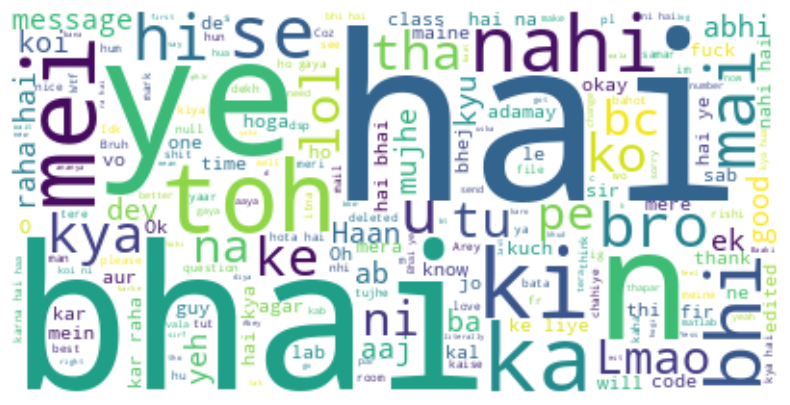

In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Aditya Pathak NC2


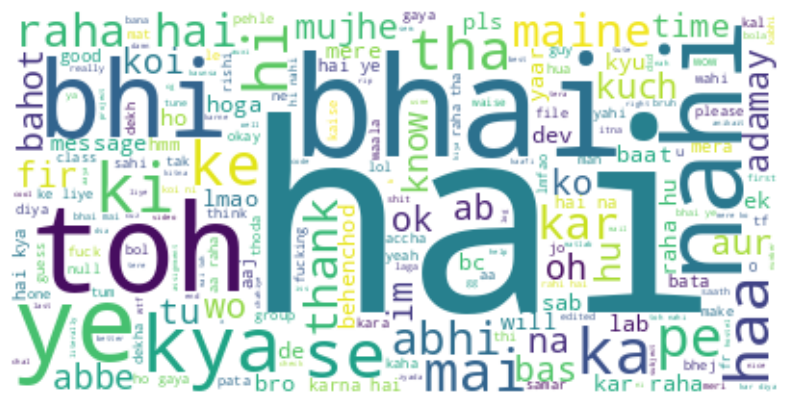

Author name Adymoss


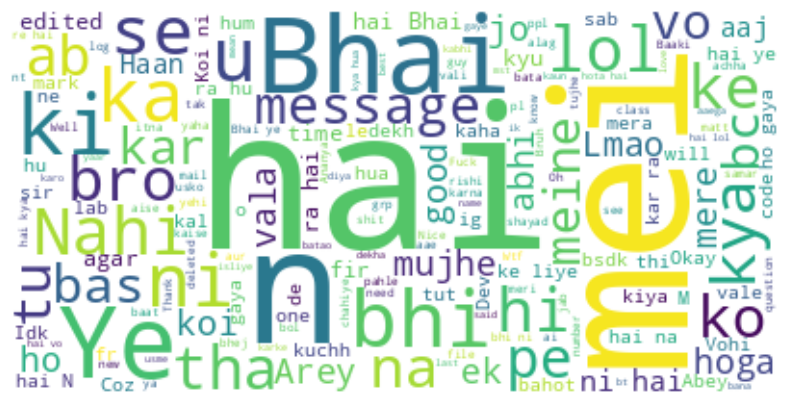

Author name Samarsayscheese


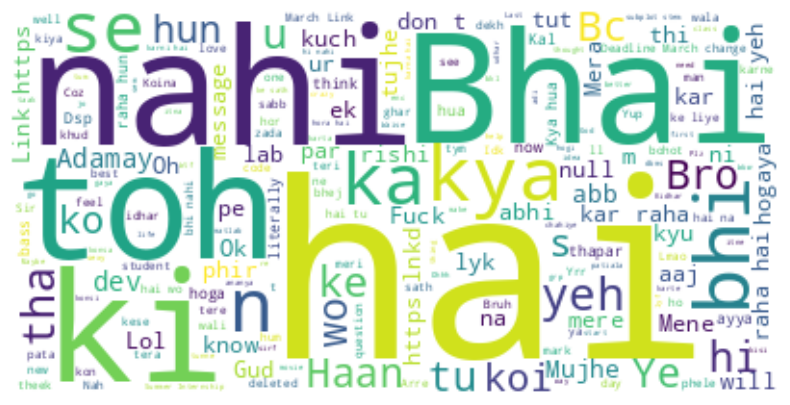

Author name Ananya


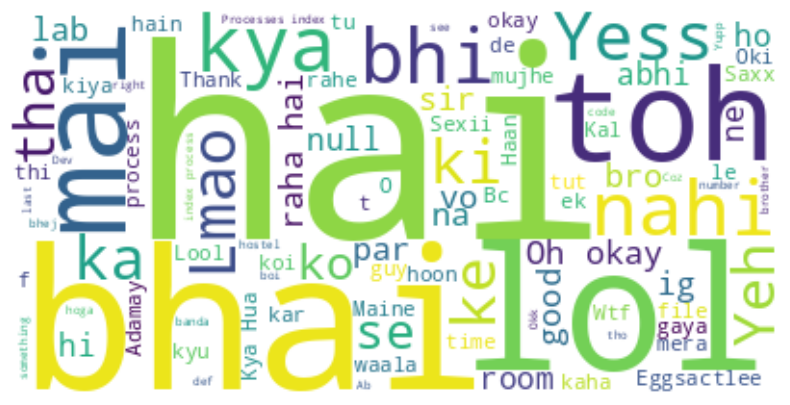

Author name Rishi NC2


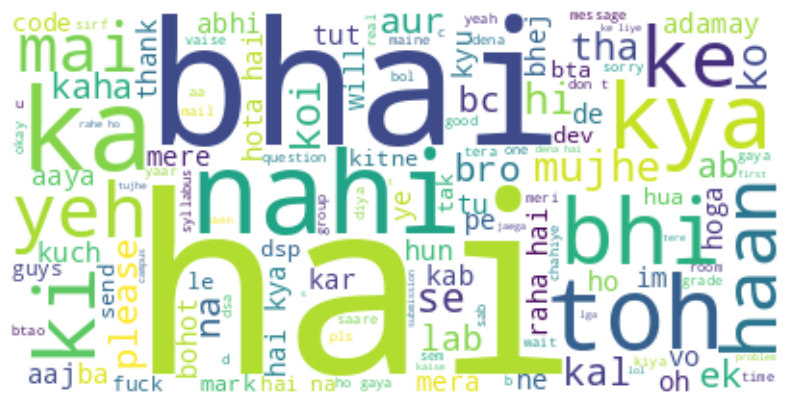

Author name Tanmay NC2


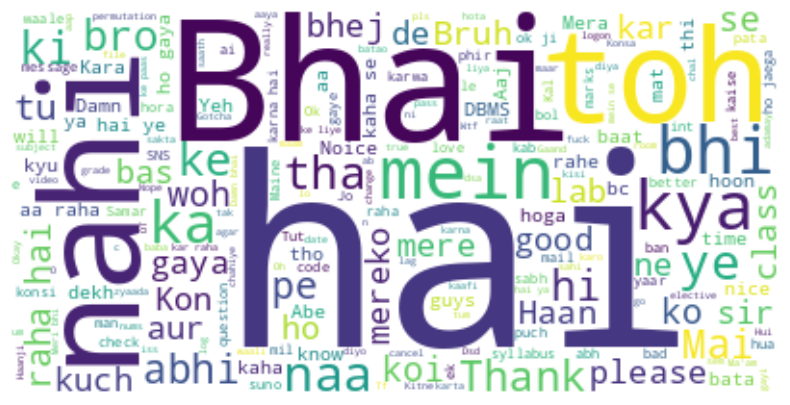

Author name Dev D


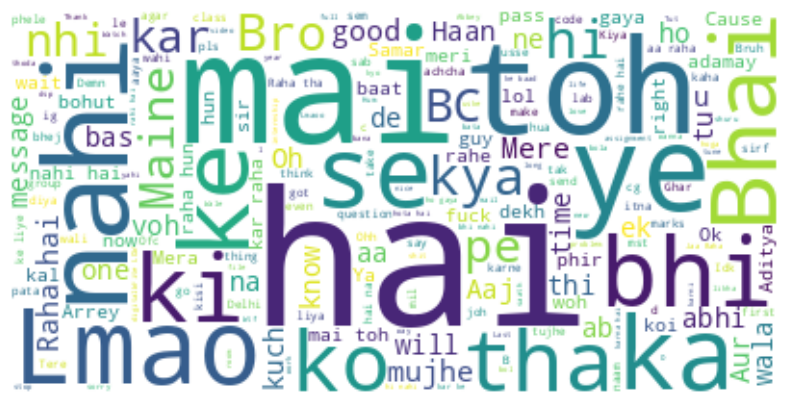

Author name Anikait NC2


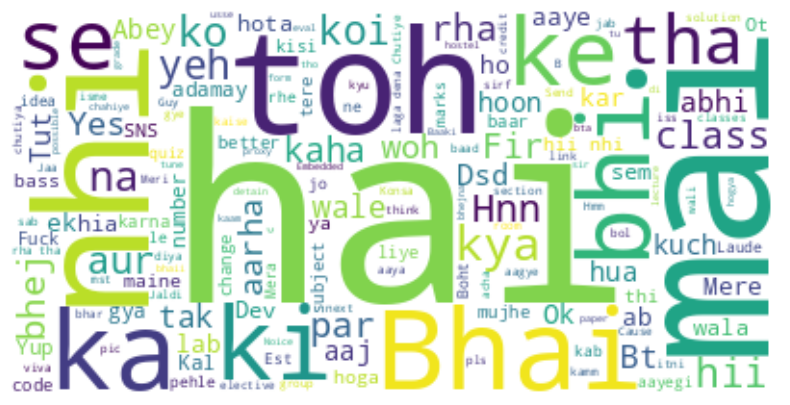

In [ ]:
l = df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()